# 공작 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc # 폰트
#한글폰트 적용-----------------------------
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
#-----------------------------------------


from datetime import datetime
import time
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 로드

In [2]:
df = pd.read_excel('today_score_data.xlsx')

In [3]:
# 데이터 확인

df.head()

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
0,1,quokka,9,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,70,11772,0,0,0,2,03시대,08시대,1,0
1,2,quokka,6,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,0,5800,0,0,0,3,03시대,08시대,1,0
2,3,quokka,4,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,0,2775,0,0,0,4,05시대,10시대,1,0
3,4,quokka,7,2022-10-01,7,1,20.9,14.4,27.6,0.0,...,0,4365,0,0,0,3,05시대,07시대,1,1
4,5,quokka,7,2022-10-02,1,1,19.4,17.2,21.6,15.8,...,0,13541,0,0,1,4,03시대,10시대,1,0


In [4]:
# 공작만 추출

peacock = df[df['name'] == 'peacock']

In [5]:
# 데이터 확인

peacock.head()

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
48,49,peacock,7,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,65,10322,0,1,0,4,00시대,06시대,0,1
49,50,peacock,5,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,40,12161,0,1,0,3,22시대,06시대,0,1
50,51,peacock,7,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,40,10637,0,1,0,3,01시대,05시대,0,1
51,52,peacock,7,2022-10-01,7,1,20.9,14.4,27.6,0.0,...,10,8722,1,1,1,3,01시대,07시대,0,1
52,53,peacock,8,2022-10-02,1,1,19.4,17.2,21.6,15.8,...,0,3019,0,1,0,4,00시대,07시대,0,1


In [6]:
peacock.describe()

,cnt,today_score,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,precipitation_check,class_check,...,sleep_score,yesterday_exercise,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_late,getup_early
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,72.50,6.229167,4.020833,0.291667,13.929167,9.595833,19.250000,3.792500,0.208333,0.729167,...,2.520833,0.395833,19.791667,8830.000000,0.125000,0.208333,0.020833,2.625000,0.020833,0.583333
std,14.00,1.076630,2.036785,0.459340,3.762636,3.929591,4.017197,14.023592,0.410414,0.449093,...,0.545371,0.494204,34.808875,4627.568007,0.334219,0.410414,0.144338,0.672404,0.144338,0.498224
min,49.00,4.000000,1.000000,0.000000,4.900000,0.800000,9.800000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,2092.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,60.75,5.750000,2.000000,0.000000,11.175000,6.650000,16.550000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,5143.500000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,72.50,6.500000,4.000000,0.000000,13.550000,9.550000,19.100000,0.000000,0.000000,1.000000,...,2.500000,0.000000,0.000000,8703.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
75%,84.25,7.000000,6.000000,1.000000,16.300000,11.800000,21.600000,0.000000,0.000000,1.000000,...,3.000000,1.000000,32.500000,11688.250000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
max,96.00,8.000000,7.000000,1.000000,21.400000,17.500000,27.700000,76.000000,1.000000,1.000000,...,4.000000,1.000000,120.000000,20086.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [7]:
# 데이터 타입 확인

peacock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 48 to 95
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     int64         
 5   dayofweek_check          48 non-null     int64         
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     int64         
 11  class_check              48 non-null     int64         
 12  gotobed_time             48 non-null 

In [8]:
#  범주형 변수 object 타입으로 변경

peacock['dayofweek'] = peacock['dayofweek'].astype(object)
peacock['dayofweek_check'] = peacock['dayofweek_check'].astype(object)
peacock['class_check'] = peacock['class_check'].astype(object)
peacock['morning_routine'] = peacock['morning_routine'].astype(object)
peacock['weather_prefer'] = peacock['weather_prefer'].astype(object)
peacock['yesterday_exercise'] = peacock['yesterday_exercise'].astype(object)
peacock['yesterday_drinking'] = peacock['yesterday_drinking'].astype(object)
peacock['period'] = peacock['period'].astype(object)
peacock['caffeine'] = peacock['caffeine'].astype(object)
peacock['precipitation_check'] = peacock['precipitation_check'].astype(object)
peacock['gotobed_late'] = peacock['gotobed_late'].astype(object)
peacock['getup_early'] = peacock['getup_early'].astype(object)

In [9]:
# 데이터 확인

peacock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 48 to 95
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     object        
 5   dayofweek_check          48 non-null     object        
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     object        
 11  class_check              48 non-null     object        
 12  gotobed_time             48 non-null 

# 데이터 분포 확인

## 범주형 변수

In [10]:
# 변수 타입이 obhect인 컬럼 추출

object_feature = [ col for col in peacock.columns if peacock[col].dtypes == "object"]
object_feature

['name',
 'dayofweek',
 'dayofweek_check',
 'precipitation_check',
 'class_check',
 'gotobed_time',
 'getup_time',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_range',
 'getup_range',
 'gotobed_late',
 'getup_early']

In [11]:
# name, gotbed_time, getup_time, precipitation_check, class_check 컬럼 제외하고 리스트 생성

category_feature = list(set(object_feature) - set(['name','gotobed_time','getup_time', 'precipitation_check',  'class_check',]))
category_feature

['period',
 'dayofweek',
 'getup_early',
 'caffeine',
 'yesterday_exercise',
 'weather_prefer',
 'dayofweek_check',
 'yesterday_drinking',
 'getup_range',
 'morning_routine',
 'gotobed_range',
 'gotobed_late']

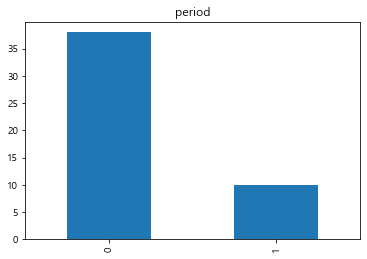

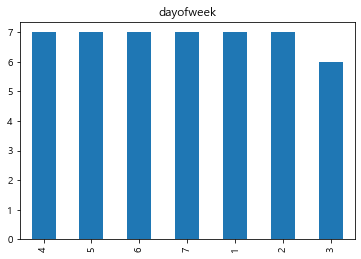

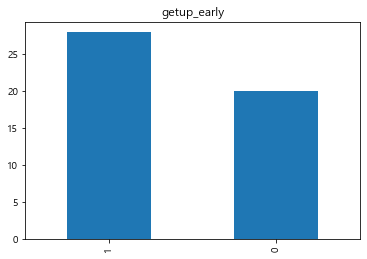

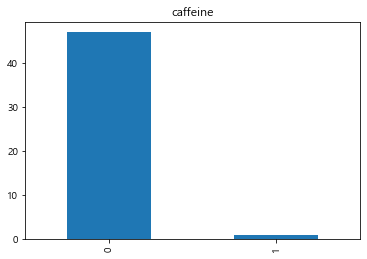

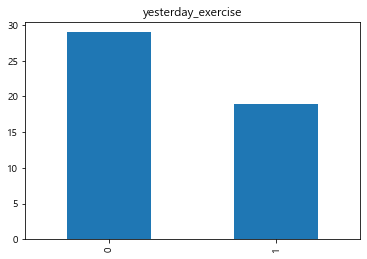

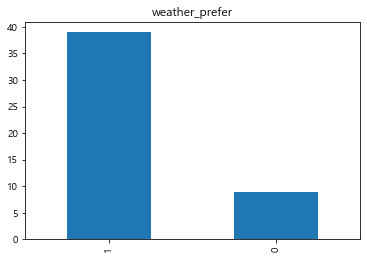

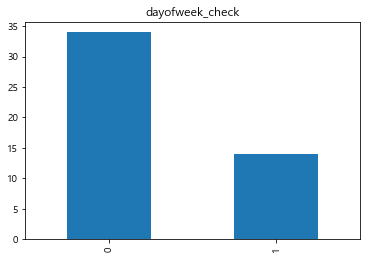

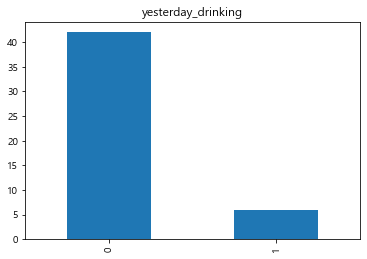

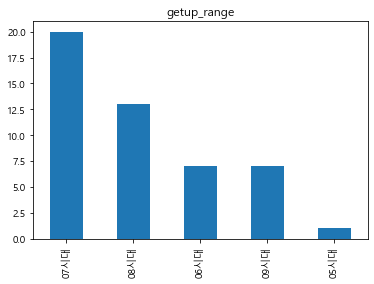

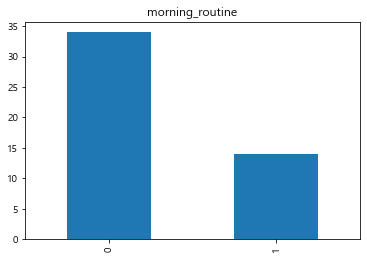

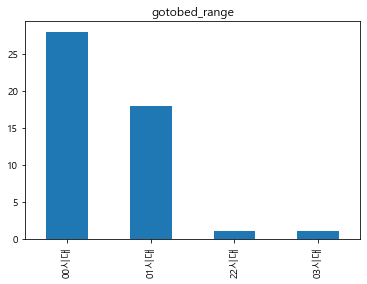

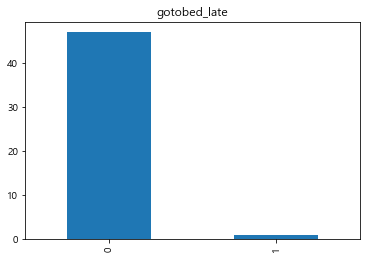

In [12]:
# 범주형 변수 분포 확인

for col in category_feature:
    peacock[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

## 수치형 변수

In [13]:
# 전체 변수중 object 변수 제외, today_score,cnt, date도 제외
numerical_feature = list(set(peacock.columns) - set(object_feature) - set(['cnt','date','today_score', 'avg_temp', 'high_temp', 'low_temp', 'precipitation', ]))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

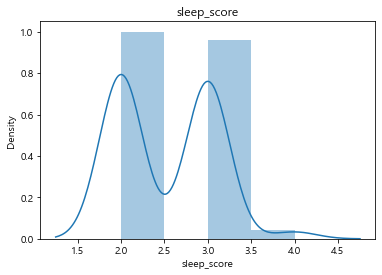

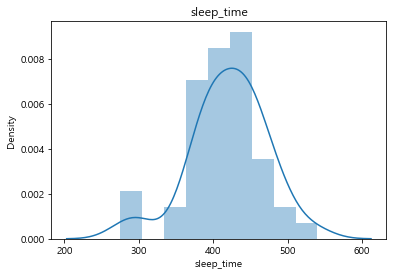

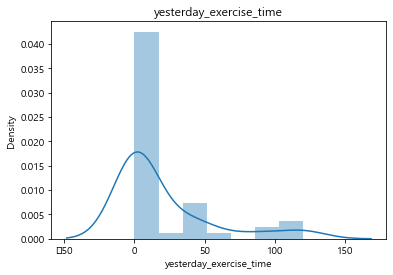

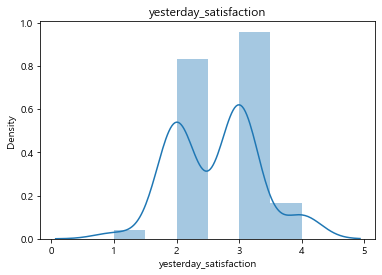

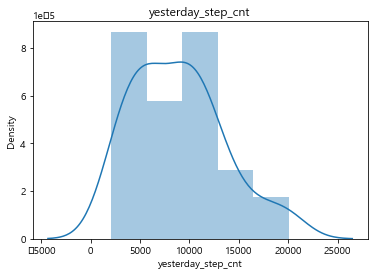

In [14]:
# 수치형 변수 분포 확인

for col in numerical_feature:
    sns.distplot(peacock.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

## 상관분석

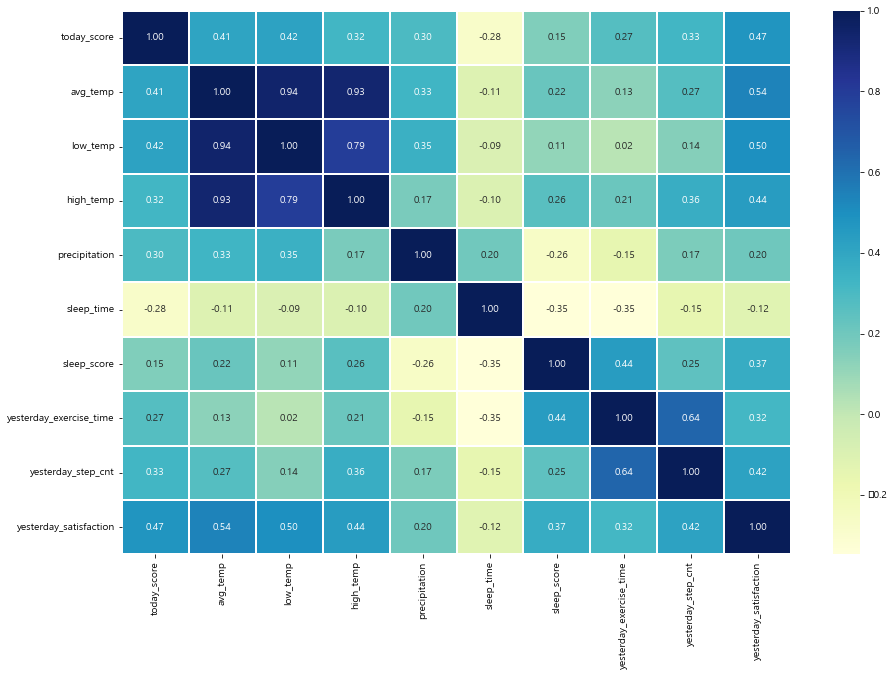

In [19]:
# 히트맵
plt.figure(figsize=(15, 10)) # 그림 사이즈 지정
heat = sns.heatmap(peacock.drop('cnt', axis = 1).drop('name', axis = 1).corr(), 
                   annot=True, # 실제 값 표시
                   fmt = '.2f', #
                   linewidths=0.2, # 경계면 구분
                   cmap='YlGnBu') # 히트맵 팔레트 색상 불러오기
plt.show()

- 상관분석 해석 
- 하나. today_score(오늘 나의 점수)와 yesterday_satisfaction(전날 만족도), yesterday_step_cnt(전날 걸음수)가 상관관계가 있다.
- 둘. yesterday_satisfaction(전날 만족도)는 sleep_score(수면 점수),  yesterday_step_cnt(전날 걸음수)와 상관관계가 있다. 

# 단일 선형 회귀

## 범주형 변수

In [28]:
#범주형 변수 확인
category_feature

['period',
 'dayofweek',
 'getup_early',
 'caffeine',
 'yesterday_exercise',
 'weather_prefer',
 'dayofweek_check',
 'yesterday_drinking',
 'getup_range',
 'morning_routine',
 'gotobed_range',
 'gotobed_late']

- 범주형 변수는 C()를 붙여서 처리
- 모든 범주형 범수의 p-value가 0.05 초과로 유의미하지 않았음

## 수치형 변수

In [46]:
# 수치형 변수 확인
numerical_feature

array(['sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

### ✨ yesterday_step_cnt : 전날 걸음 수
- 전날 걸음수에 따른 오늘나의점수 차이가 없다는 귀무가설 기각
- 1보 더 걸을수록 7.572e-05점 높아짐

In [79]:
test = ols('today_score ~ yesterday_step_cnt', data = peacock).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     5.449
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0240
Time:                        18:36:53   Log-Likelihood:                -68.461
No. Observations:                  48   AIC:                             140.9
Df Residuals:                      46   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.5606      0

### ✨ yesterday_satisfaction : 전날 만족도 (5점 만점)
- 전날 만족도에 따른 나의오늘점수 차이가 없다는 귀무가설 기각
- 1점 높을수록 0.7588점 증가

In [80]:
test = ols('today_score ~ yesterday_satisfaction', data = peacock).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     13.32
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000668
Time:                        18:37:20   Log-Likelihood:                -65.043
No. Observations:                  48   AIC:                             134.1
Df Residuals:                      46   BIC:                             137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

# 다중회귀분석 및 최종 회귀식

##  유의미한 변수로만 확인
- yesterday_step_cnt, yesterday_satisfaction 2개만 사용
- 단순회귀분석 했을 때 각각의 수정 r제곱(0.086, 0.208) 보다 높음(0.211)
- 하지만 yesterday_step_cnt는 p값이 0.05보다 높음

In [81]:
test = ols('today_score ~ yesterday_step_cnt + yesterday_satisfaction', data = peacock).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     7.270
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00184
Time:                        18:39:02   Log-Likelihood:                -64.428
No. Observations:                  48   AIC:                             134.9
Df Residuals:                      45   BIC:                             140.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

## 전날 만족도만 확인

In [90]:
test = ols('today_score ~ yesterday_satisfaction', data = peacock).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     13.32
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000668
Time:                        18:49:51   Log-Likelihood:                -65.043
No. Observations:                  48   AIC:                             134.1
Df Residuals:                      46   BIC:                             137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### 전날 만족도에 영향을 미치는 변수는?
- 상관관계를 살펴봤을 때 높게 나온 변수를 사용

In [83]:
test = ols('yesterday_satisfaction ~ yesterday_step_cnt', data = peacock).fit().summary()
print(test)

                              OLS Regression Results                              
Dep. Variable:     yesterday_satisfaction   R-squared:                       0.175
Model:                                OLS   Adj. R-squared:                  0.157
Method:                     Least Squares   F-statistic:                     9.761
Date:                    Thu, 24 Nov 2022   Prob (F-statistic):            0.00308
Time:                            18:44:33   Log-Likelihood:                -43.934
No. Observations:                      48   AIC:                             91.87
Df Residuals:                          46   BIC:                             95.61
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [84]:
test = ols('yesterday_satisfaction ~ sleep_score', data = peacock).fit().summary()
print(test)

                              OLS Regression Results                              
Dep. Variable:     yesterday_satisfaction   R-squared:                       0.137
Model:                                OLS   Adj. R-squared:                  0.118
Method:                     Least Squares   F-statistic:                     7.291
Date:                    Thu, 24 Nov 2022   Prob (F-statistic):            0.00967
Time:                            18:45:45   Log-Likelihood:                -45.022
No. Observations:                      48   AIC:                             94.04
Df Residuals:                          46   BIC:                             97.79
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

### 전날 만족도에 걸음수와 수면질의 영향 확인

In [85]:
test = ols('yesterday_satisfaction ~ yesterday_step_cnt + sleep_score', data = peacock).fit().summary()
print(test)

                              OLS Regression Results                              
Dep. Variable:     yesterday_satisfaction   R-squared:                       0.251
Model:                                OLS   Adj. R-squared:                  0.217
Method:                     Least Squares   F-statistic:                     7.525
Date:                    Thu, 24 Nov 2022   Prob (F-statistic):            0.00152
Time:                            18:46:07   Log-Likelihood:                -41.628
No. Observations:                      48   AIC:                             89.26
Df Residuals:                          45   BIC:                             94.87
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# 최종 회귀식

- 해석: 공작은 오늘나의점수를 높게 시작하기 위해서는 전날 만족스러운 하루를 보내야 한다. 다른 변수는 큰 영향이 없다. 만족스러운 하루를 보내는 데에는 많이 걷고 잘 자는 게 도움이 된다. 

In [95]:
test = ols('today_score ~ yesterday_satisfaction', data = peacock).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     13.32
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000668
Time:                        18:53:05   Log-Likelihood:                -65.043
No. Observations:                  48   AIC:                             134.1
Df Residuals:                      46   BIC:                             137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4